# Classification of MNIST data using ANN

In [1]:
import pandas as pd
import numpy as np

In [2]:
import tensorflow as tf
from tensorflow import keras
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Flatten

In [3]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()

In [4]:
# Normalizing
x_train = x_train/255.0
x_test = x_test/255.0

In [5]:
x_test.shape[1:3]

(28, 28)

In [6]:
model = Sequential([
    Flatten(input_shape=x_train.shape[1:3]),
    Dense(128, activation='relu'),
    Dense(10, activation='softmax')
])

model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

history = model.fit(x_train, y_train, epochs=10 ,validation_data=(x_test, y_test))

Epoch 1/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2630 - accuracy: 0.9243 - val_loss: 0.1477 - val_accuracy: 0.9558
Epoch 2/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.1143 - accuracy: 0.9660 - val_loss: 0.0997 - val_accuracy: 0.9692
Epoch 3/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0783 - accuracy: 0.9761 - val_loss: 0.0799 - val_accuracy: 0.9756
Epoch 4/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0583 - accuracy: 0.9823 - val_loss: 0.0703 - val_accuracy: 0.9770
Epoch 5/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0453 - accuracy: 0.9860 - val_loss: 0.0818 - val_accuracy: 0.9730
Epoch 6/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0354 - accuracy: 0.9889 - val_loss: 0.0735 - val_accuracy: 0.9776
Epoch 7/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0279 - accuracy: 0.9916 - val_loss: 0.0703 - val_accuracy:

In [7]:
from sklearn.metrics import accuracy_score, confusion_matrix
y_pred = model.predict(x_test)
conf_mat = confusion_matrix(y_test, np.argmax(y_pred, axis=1))
print(conf_mat)

print(f"Accuracy Score is: {accuracy_score(y_test, np.argmax(y_pred, axis=1))}")

313/313 [==============================] - 0s 1ms/step
[[ 973    1    0    1    0    0    1    1    2    1]
 [   0 1127    2    1    0    1    2    0    2    0]
 [   4    2 1007    3    5    0    1    3    6    1]
 [   0    0    4  987    0   10    0    3    1    5]
 [   2    0    5    0  968    0    1    0    1    5]
 [   3    0    0    7    1  869    5    0    5    2]
 [   4    3    1    1    4    2  942    0    1    0]
 [   0    4    7    3    1    0    0 1005    2    6]
 [   9    0    3    6    5    4    3    3  938    3]
 [   0    2    0    4   20    5    0    5    3  970]]
Accuracy Score is: 0.9786


In [8]:
loss = history.history['loss'] 
acc = history.history['accuracy']
val_loss = history.history['val_loss']
val_acc = history.history['accuracy']

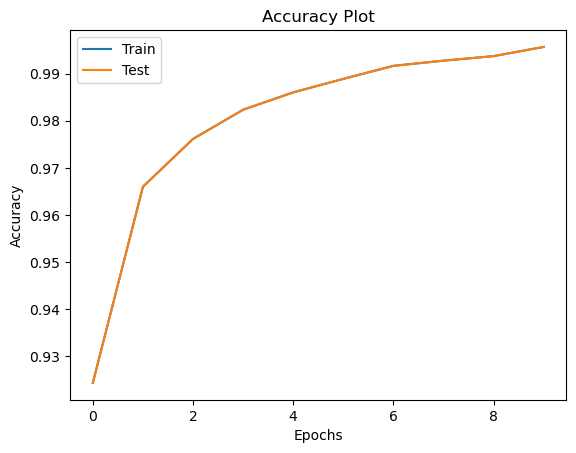

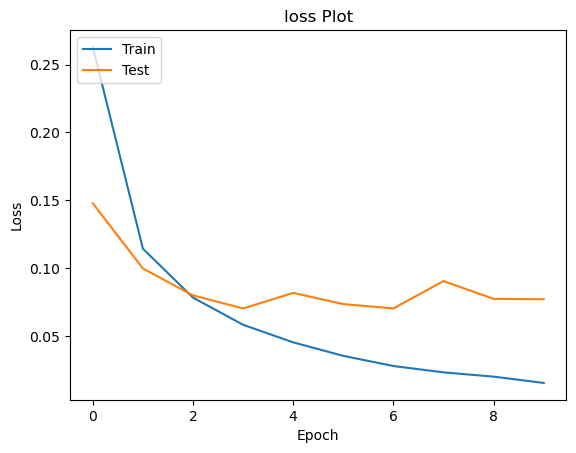

In [9]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.plot(acc)
plt.plot(val_acc)
plt.title('Accuracy Plot')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend(['Train', 'Test'])
plt.show()

plt.plot(loss)
plt.plot(val_loss)
plt.title('loss Plot')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()
